<a href="https://colab.research.google.com/github/a-nagar/vistra-intermediate/blob/main/Intermediate_Class2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt


df = pd.read_csv("https://an-utd-python.s3.us-west-1.amazonaws.com/unemp.csv")

<Axes: xlabel='unemploy', ylabel='Count'>

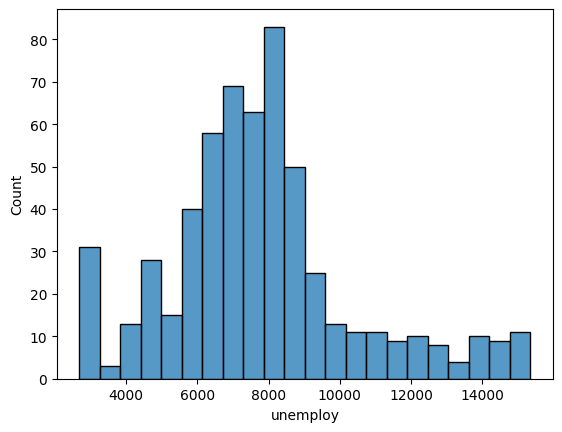

In [2]:
sns.histplot(df['unemploy'])

# New Section

<Axes: ylabel='unemploy'>

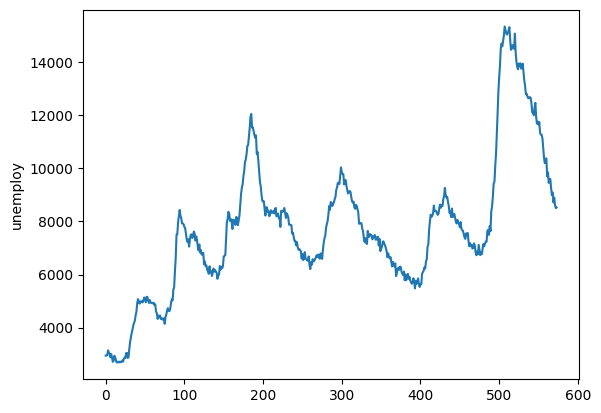

In [3]:
sns.lineplot(x = df.index, y = df['unemploy'])

In [4]:
# unemploy = w0 + w1 * (pce) + w2 * (pop) + w3 * (psavert) + w4 * (unempd)
# w's are unknown
# my library is going to tell me the best value of w's
# i will tell the library to find best w's that minimize error + don't cause overfitting
# suppose, value of w1 = 5000 and value of w3 = 0.006
# provided -> the numbers should be on same scale (range)
# do you conclude someting?
# if you have v large number of predictors (variables), one way you could limit them is by looking at their correlations with the predicted value
df

,pce,pop,psavert,uempmed,unemploy
0,506.7,198712.000,12.6,4.5,2944
1,509.8,198911.000,12.6,4.7,2945
2,515.6,199113.000,11.9,4.6,2958
3,512.2,199311.000,12.9,4.9,3143
4,517.4,199498.000,12.8,4.7,3066
...,...,...,...,...,...
569,12062.0,319746.157,7.6,12.9,8717
570,12046.0,319928.646,7.7,13.2,8903
571,12082.4,320074.511,7.9,12.9,8610
572,12158.3,320230.786,7.4,12.0,8504


In [5]:
print(df.shape)
df.describe() # what does this command do?

(574, 5)


,pce,pop,psavert,uempmed,unemploy
count,574.000000,574.000000,574.000000,574.000000,574.000000
mean,4820.092683,257159.652662,8.567247,8.608711,7771.310105
std,3556.803613,36682.398508,2.964179,4.106645,2641.959180
min,506.700000,198712.000000,2.200000,4.000000,2685.000000
25%,1578.300000,224896.000000,6.400000,6.000000,6284.000000
50%,3936.850000,253060.000000,8.400000,7.500000,7494.000000
75%,7626.325000,290290.750000,11.100000,9.100000,8685.500000
max,12193.800000,320402.295000,17.300000,25.200000,15352.000000


In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [7]:
df_transformed = pd.DataFrame(sc.fit_transform(df))

In [8]:
df_transformed.describe()  # range of data changes -> becomes a normal distribution with mean = 0 and sd = 1

,0,1,2,3,4
count,5.740000e+02,5.740000e+02,5.740000e+02,5.740000e+02,5.740000e+02
mean,4.951517e-17,-7.922428e-16,-2.970910e-16,3.466062e-16,-1.485455e-16
std,1.000872e+00,1.000872e+00,1.000872e+00,1.000872e+00,1.000872e+00
min,-1.213774e+00,-1.594733e+00,-2.149938e+00,-1.123236e+00,-1.926883e+00
25%,-9.122292e-01,-8.803076e-01,-7.317835e-01,-6.357955e-01,-5.634483e-01
50%,-2.485414e-01,-1.118582e-01,-5.647204e-02,-2.702152e-01,-1.050554e-01
75%,7.896641e-01,9.039756e-01,8.551985e-01,1.197371e-01,3.463291e-01
max,2.074936e+00,1.725563e+00,2.948664e+00,4.043632e+00,2.871847e+00


In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
mm = MinMaxScaler()
df_mm = pd.DataFrame(mm.fit_transform(df), columns = df.columns)

In [11]:
df_mm.describe()  # makes every attribute in range [0, 1]

,pce,pop,psavert,uempmed,unemploy
count,574.000000,574.000000,574.000000,574.000000,574.000000
mean,0.369073,0.480298,0.421672,0.217392,0.401540
std,0.304336,0.301441,0.196303,0.193710,0.208570
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.091691,0.215169,0.278146,0.094340,0.284124
50%,0.293499,0.446609,0.410596,0.165094,0.379648
75%,0.609187,0.752556,0.589404,0.240566,0.473711
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
df_mm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pce       574 non-null    float64
 1   pop       574 non-null    float64
 2   psavert   574 non-null    float64
 3   uempmed   574 non-null    float64
 4   unemploy  574 non-null    float64
dtypes: float64(5)
memory usage: 22.5 KB


In [13]:
X = df_mm[['pce', 'pop', 'psavert', 'uempmed']]

In [14]:
y = df_mm['unemploy']

In [15]:
X

,pce,pop,psavert,uempmed
0,0.000000,0.000000,0.688742,0.023585
1,0.000265,0.001635,0.688742,0.033019
2,0.000762,0.003295,0.642384,0.028302
3,0.000471,0.004922,0.708609,0.042453
4,0.000916,0.006459,0.701987,0.033019
...,...,...,...,...
569,0.988723,0.994608,0.357616,0.419811
570,0.987354,0.996108,0.364238,0.433962
571,0.990468,0.997306,0.377483,0.419811
572,0.996962,0.998591,0.344371,0.377358


In [16]:
y

0      0.020447
1      0.020526
2      0.021552
3      0.036157
4      0.030078
         ...   
569    0.476198
570    0.490882
571    0.467751
572    0.459383
573    0.461119
Name: unemploy, Length: 574, dtype: float64

In [17]:
# X -> predictors / attributes / features
# y -> predicted
# train-test split is done  to get 2 separate dataframes
# i will not show the testing data to my model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)

(401, 4)
(173, 4)


In [18]:
# 2 approaches
# approach 1: No overfitting avoidance
lr = LinearRegression()
lr.fit(X_train, y_train)  # lr is the trained model

LinearRegression()

In [19]:
lr.coef_

array([-1.53219329,  1.65052461,  0.21860231,  0.95772098])

In [20]:
lr.intercept_

-0.12710992039783686

In [21]:
# unemp = -0.5970338085553475 - 1.44249605 * (pce) + 1.5627215 * (pop) + 0.20900517 * psavert + 0.94963013 * uempmed

# unemp and pce vary in reverse direction with a weight of - 1.44249605
# unemp and pop vary in same direction with a weight of 1.5627215
#..
# model has been built using training data
# we need to evaluate this on testing data

lr.predict(X_test)

array([0.46043303, 0.04074317, 0.6490005 , 0.49875429, 0.05999024,
       0.42816864, 0.35548269, 0.38994078, 0.29611805, 0.32362455,
       0.03817016, 0.36465648, 0.31183232, 0.46047275, 0.3273371 ,
       0.35191741, 0.24976549, 0.57482692, 0.83829534, 0.45683429,
       0.50653753, 0.21593208, 0.34994128, 0.04603837, 0.32130081,
       0.08601444, 0.34280705, 0.32357512, 0.34750658, 0.40692028,
       0.49174565, 0.50064441, 0.22930509, 0.44434246, 0.27899186,
       0.39487696, 0.30087977, 0.22275679, 0.4584424 , 0.47791774,
       0.45543478, 0.25305074, 0.53463265, 0.26323479, 0.40699024,
       0.04586064, 0.39384826, 0.32440891, 0.35478328, 0.40370746,
       0.32259939, 0.41033933, 0.23638962, 0.36861309, 0.76347307,
       0.32041113, 0.45533691, 0.46790103, 0.35015352, 0.21562766,
       0.28899605, 0.3883213 , 0.6688288 , 0.49368206, 0.45999471,
       0.54159235, 0.45076495, 0.28332661, 0.2988065 , 0.45608109,
       0.35163962, 0.47368432, 0.80215591, 0.48631353, 0.11434

In [22]:
y_test

330    0.370253
16     0.002368
559    0.605037
438    0.448804
15     0.000316
         ...   
473    0.321860
396    0.241730
418    0.451093
82     0.159469
146    0.276703
Name: unemploy, Length: 173, dtype: float64

In [23]:
print("Training Dataset Predictions below")
pred_train_lr= lr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lr)))
print(r2_score(y_train, pred_train_lr))
print("Test Dataset Predictions below")
pred_test_lr= lr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lr)))
print(r2_score(y_test, pred_test_lr))

Training Dataset Predictions below
0.0778732436945813
0.8643441807823631
Test Dataset Predictions below
0.08248007987887075
0.8316156967087421


Test error is 8.24%.

Are you OK with this error?
True bill = 100, my prediction would be in the range 100 +/- 8.24
(91.76 - 108.24)

- Assumed a linear relationship (may not be true)
  2000 sq ft - 500,000
  4000 sq ft - 1,000,000

- ML: is not an exact science.
  you have to try various things e.g. add more variables, adding more training data

In [24]:
# approach 2: overfitting avoidance
rr = Ridge(alpha=0.2) # Ridge -> sq of weights, alpha = the multiplication factor

In [25]:
rr.fit(X_train, y_train)
pred_train_rr= rr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train, pred_train_rr))


0.0816828784188963
0.8507466920484034


In [26]:
# testing accuracy improves
pred_test_rr= rr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rr)))
print(r2_score(y_test, pred_test_rr))

0.08429912063303031
0.8241065986547377


In [28]:
from sklearn.datasets import fetch_california_housing

In [29]:
california = fetch_california_housing(as_frame=True)

In [30]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [31]:
df = california.data

In [34]:
df['price'] = california.target

In [35]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [36]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [37]:
# which 2 or 3 attributes seem most closely correlated (ignore +/- sign) with the medv variable?
df_new = df[['MedInc', 'HouseAge', 'AveRooms', 'price']]

In [38]:
df_new.describe()

,MedInc,HouseAge,AveRooms,price
count,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,2.068558
std,1.899822,12.585558,2.474173,1.153956
min,0.499900,1.000000,0.846154,0.149990
25%,2.563400,18.000000,4.440716,1.196000
50%,3.534800,29.000000,5.229129,1.797000
75%,4.743250,37.000000,6.052381,2.647250
max,15.000100,52.000000,141.909091,5.000010


In [39]:
mm = MinMaxScaler()
df_scaled = pd.DataFrame(mm.fit_transform(df_new), columns = df_new.columns)

In [40]:
df_scaled.describe()

,MedInc,HouseAge,AveRooms,price
count,20640.000000,20640.000000,20640.000000,20640.000000
mean,0.232464,0.541951,0.032488,0.395579
std,0.131020,0.246776,0.017539,0.237928
min,0.000000,0.000000,0.000000,0.000000
25%,0.142308,0.333333,0.025482,0.215671
50%,0.209301,0.549020,0.031071,0.339588
75%,0.292641,0.705882,0.036907,0.514897
max,1.000000,1.000000,1.000000,1.000000


In [41]:
X = df_scaled[['MedInc', 'HouseAge', 'AveRooms']]

In [43]:
y = df_scaled['price']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)

(14448, 3)
(6192, 3)


In [ ]:
X.shape

(506, 5)

In [45]:
# approach 1: No overfitting avoidance
lr = LinearRegression()

In [46]:
lr.fit(X_train, y_train)

LinearRegression()

In [47]:
lr.coef_

array([ 1.32750741,  0.17474617, -0.69292594])

In [48]:
lr.intercept_

0.013338304207745455

In [49]:

# correlation not the same as causation
print("Training Dataset Predictions below")
pred_train_lr= lr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lr)))
print(r2_score(y_train, pred_train_lr))
print("Test Dataset Predictions below")
pred_test_lr= lr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lr)))
print(r2_score(y_test, pred_test_lr))

Training Dataset Predictions below
0.1649428901512113
0.5163878196415979
Test Dataset Predictions below
0.16912091146349525
0.5016760207084685


In [50]:
rr = Ridge(alpha=0.6) # Ridge -> sq of weights, alpha = the multiplication factor

rr.fit(X_train, y_train)
pred_train_rr= rr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train, pred_train_rr))

0.1649507530545716
0.5163417105129138


In [51]:
# testing accuracy improves
pred_test_rr= rr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rr)))
print(r2_score(y_test, pred_test_rr))

0.16916351466456628
0.5014249237796384


<Axes: xlabel='MedInc', ylabel='price'>

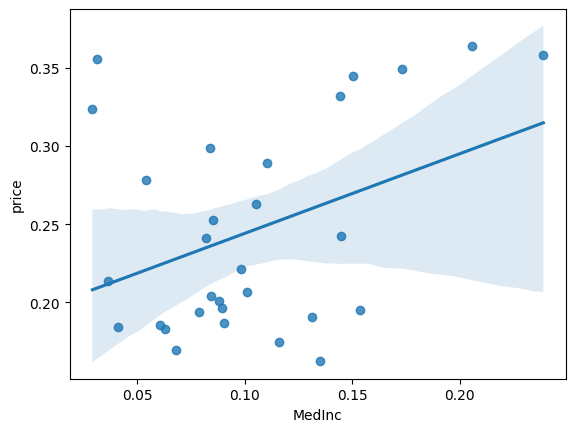

In [52]:
sns.regplot(x="MedInc", y="price", data=df_scaled.loc[21:50,:])

<Axes: xlabel='AveRooms', ylabel='price'>

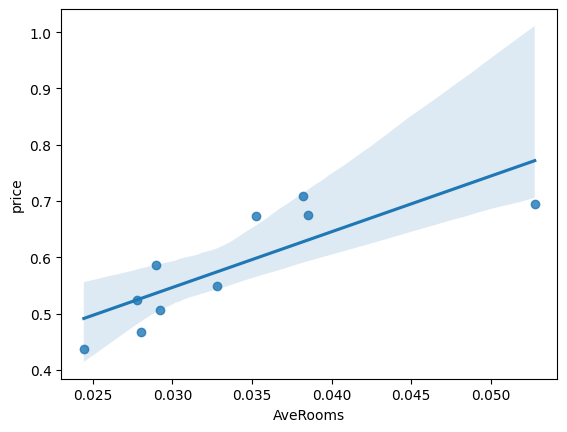

In [53]:
sns.regplot(x="AveRooms", y="price", data=df_scaled.loc[1:10,:])